<a href="https://colab.research.google.com/github/kaushal27120/Climate_analysis/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df_humidity = pd.read_csv('/content/humidity.csv')
df_pressure = pd.read_csv('/content/pressure.csv')
df_temperature = pd.read_csv('/content/temperature.csv')
df_weather = pd.read_csv('/content/weather_description.csv')
df_wind_direction = pd.read_csv('/content/wind_direction.csv')
df_wind_speed = pd.read_csv('/content/wind_speed.csv')

print(df_humidity)
print(df_pressure)
print(df_temperature)
print(df_weather)
print(df_wind_direction)
print(df_wind_speed)

                  datetime  Vancouver  Portland  San Francisco  Seattle  \
0      2012-10-01 12:00:00        NaN       NaN            NaN      NaN   
1      2012-10-01 13:00:00       76.0      81.0           88.0     81.0   
2      2012-10-01 14:00:00       76.0      80.0           87.0     80.0   
3      2012-10-01 15:00:00       76.0      80.0           86.0     80.0   
4      2012-10-01 16:00:00       77.0      80.0           85.0     79.0   
...                    ...        ...       ...            ...      ...   
45248  2017-11-29 20:00:00        NaN      81.0            NaN     93.0   
45249  2017-11-29 21:00:00        NaN      71.0            NaN     87.0   
45250  2017-11-29 22:00:00        NaN      71.0            NaN     93.0   
45251  2017-11-29 23:00:00        NaN      71.0            NaN     87.0   
45252  2017-11-30 00:00:00        NaN      76.0            NaN     75.0   

       Los Angeles  San Diego  Las Vegas  Phoenix  Albuquerque  ...  \
0              NaN        Na

In [2]:
df_humidity_long = df_humidity.melt(id_vars=["datetime"], var_name="city", value_name="humidity")
df_pressure_long = df_pressure.melt(id_vars=["datetime"], var_name="city", value_name="pressure")
df_temperature_long = df_temperature.melt(id_vars=["datetime"], var_name="city", value_name="temperature")
df_weather_long = df_weather.melt(id_vars=["datetime"], var_name="city", value_name="weather")
df_wind_direction_long = df_wind_direction.melt(id_vars=["datetime"], var_name="city", value_name="wind_direction")
df_wind_speed_long = df_wind_speed.melt(id_vars=["datetime"], var_name="city", value_name="wind_speed")



In [3]:
dfs = [df_weather_long, df_temperature_long, df_humidity_long, df_pressure_long, df_wind_direction_long, df_wind_speed_long]

from functools import reduce
df_final = reduce(lambda left, right: pd.merge(left, right, on=["datetime", "city"], how="outer"), dfs)
print(df_final.head())
print(df_final.shape)


              datetime         city weather  temperature  humidity  pressure  \
0  2012-10-01 12:00:00  Albuquerque     NaN          NaN       NaN       NaN   
1  2012-10-01 12:00:00      Atlanta     NaN          NaN       NaN       NaN   
2  2012-10-01 12:00:00    Beersheba     NaN          NaN       NaN       NaN   
3  2012-10-01 12:00:00       Boston     NaN          NaN       NaN       NaN   
4  2012-10-01 12:00:00    Charlotte     NaN          NaN       NaN       NaN   

   wind_direction  wind_speed  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
(1629108, 8)


In [4]:
df_final.isnull().sum()

,0
datetime,0
city,0
weather,7955
temperature,8030
humidity,28651
pressure,16680
wind_direction,7975
wind_speed,7993


In [5]:
df_final.dropna(inplace=True)
df_final.isnull().sum()
df_final.shape

(1596319, 8)

In [6]:
df_final.dtypes

,0
datetime,object
city,object
weather,object
temperature,float64
humidity,float64
pressure,float64
wind_direction,float64
wind_speed,float64


In [7]:
df_final.head()

,datetime,city,weather,temperature,humidity,pressure,wind_direction,wind_speed
9,2012-10-01 12:00:00,Eilat,haze,309.10,25.0,1011.0,360.0,8.0
36,2012-10-01 13:00:00,Albuquerque,sky is clear,285.12,50.0,1024.0,360.0,4.0
37,2012-10-01 13:00:00,Atlanta,light rain,294.03,94.0,1006.0,110.0,3.0
38,2012-10-01 13:00:00,Beersheba,sky is clear,307.59,50.0,984.0,135.0,1.0
39,2012-10-01 13:00:00,Boston,sky is clear,287.17,68.0,1014.0,60.0,3.0


In [8]:
print(df_final.describe())
print(df_final.info())

        temperature      humidity      pressure  wind_direction    wind_speed
count  1.596319e+06  1.596319e+06  1.596319e+06    1.596319e+06  1.596319e+06
mean   2.886874e+02  6.812557e+01  1.016525e+03    1.832802e+02  2.798369e+00
std    1.033184e+01  2.243927e+01  1.562323e+01    1.058160e+02  2.084852e+00
min    2.423367e+02  5.000000e+00  8.000000e+02    0.000000e+00  0.000000e+00
25%    2.820700e+02  5.300000e+01  1.012000e+03    9.500000e+01  1.000000e+00
50%    2.896825e+02  7.200000e+01  1.017000e+03    1.900000e+02  2.000000e+00
75%    2.963100e+02  8.700000e+01  1.024000e+03    2.700000e+02  4.000000e+00
max    3.212200e+02  1.000000e+02  1.100000e+03    3.600000e+02  5.000000e+01
<class 'pandas.core.frame.DataFrame'>
Index: 1596319 entries, 9 to 1629106
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   datetime        1596319 non-null  object 
 1   city            1596319 non-null  object 
 2 

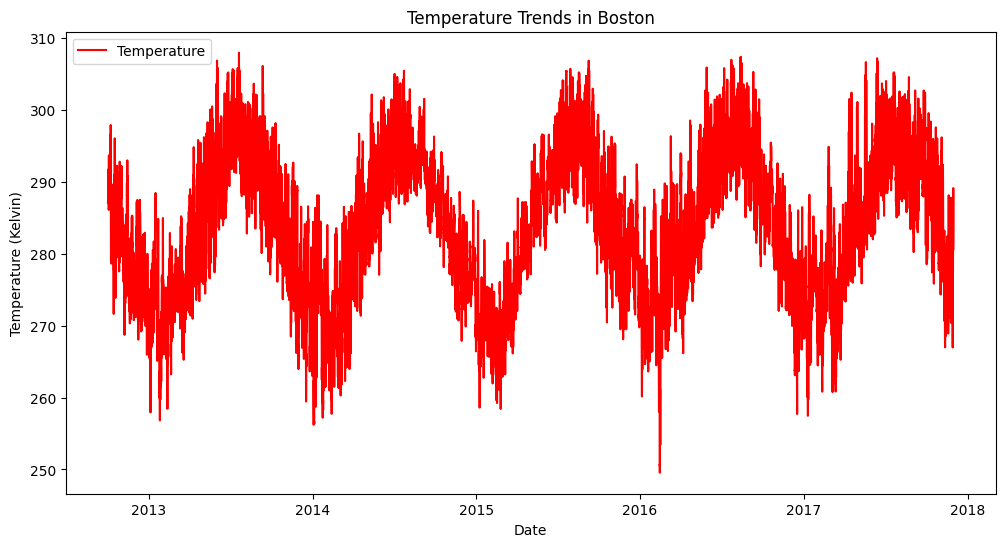

In [9]:
import matplotlib.pyplot as plt

df_final["datetime"] = pd.to_datetime(df_final["datetime"])
df_city = df_final[df_final["city"] == "Boston"]

plt.figure(figsize=(12, 6))
plt.plot(df_city["datetime"], df_city["temperature"], label="Temperature", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (Kelvin)")
plt.title("Temperature Trends in Boston")
plt.legend()
plt.show()


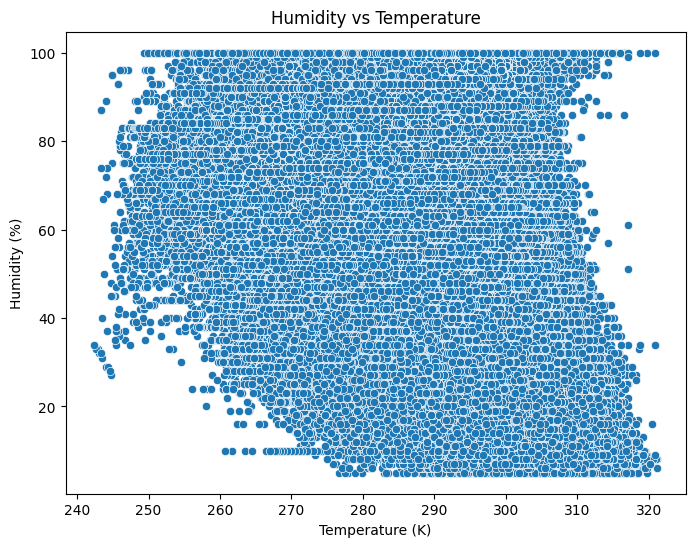

In [10]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_final["temperature"], y=df_final["humidity"])
plt.xlabel("Temperature (K)")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Temperature")
plt.show()


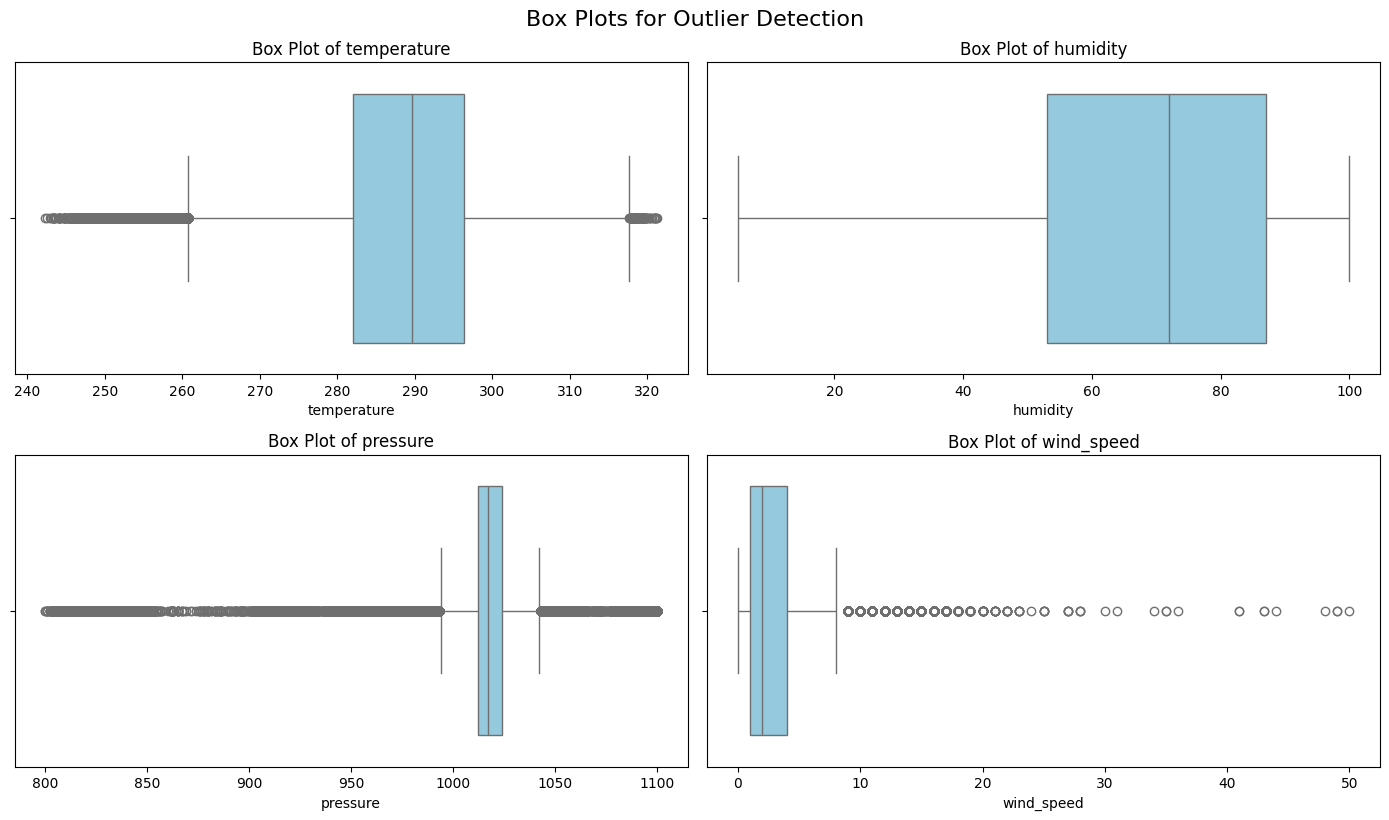

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['temperature', 'humidity', 'pressure', 'wind_speed']

plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_final[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, y=1.02)
plt.show()


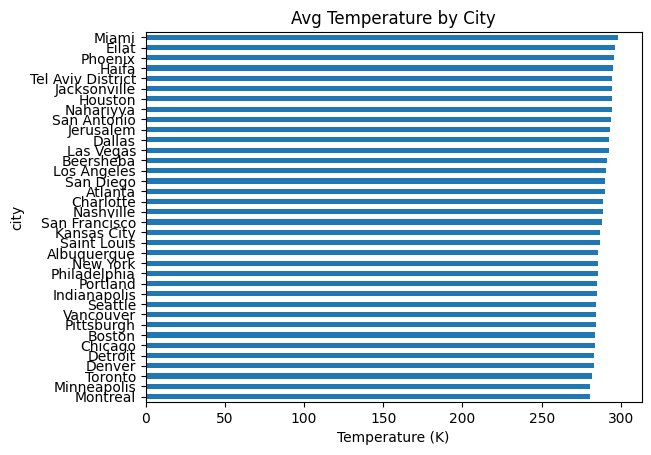

In [12]:
df_final.groupby('city')['temperature'].mean().sort_values().plot(kind='barh', title='Avg Temperature by City')
plt.xlabel('Temperature (K)')
plt.show()

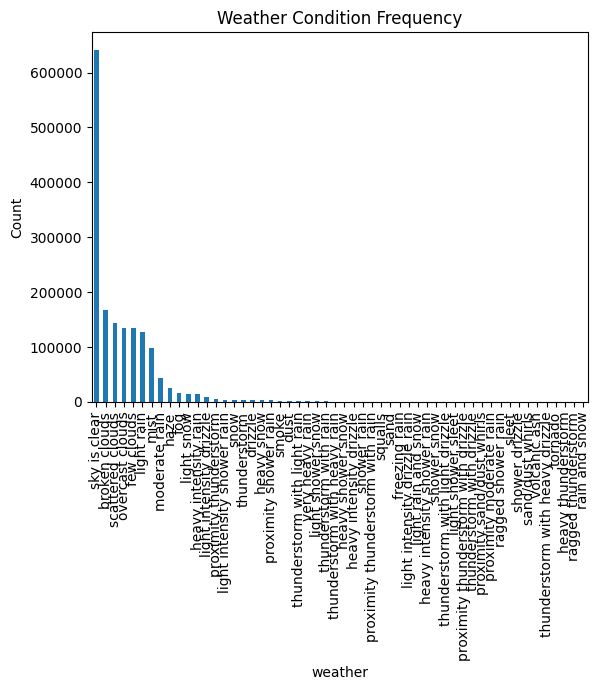

In [13]:
df_final['weather'].value_counts().plot(kind='bar', title='Weather Condition Frequency')
plt.ylabel('Count')
plt.show()


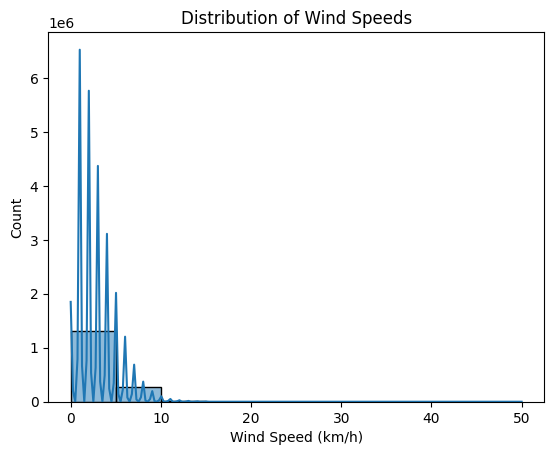

In [14]:
sns.histplot(df_final['wind_speed'], bins=10, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.show()


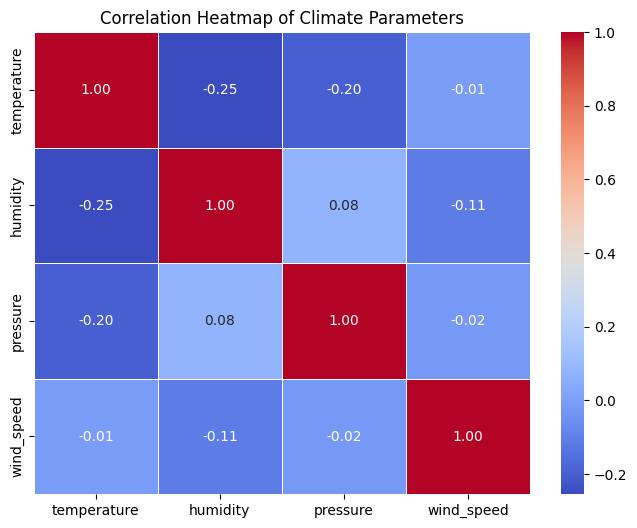

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_final[["temperature", "humidity", "pressure", "wind_speed"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climate Parameters")
plt.show()


In [16]:
df_final.set_index("datetime", inplace=True)
df_final.sort_index(inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final["weather_encoded"] = le.fit_transform(df_final["weather"])


In [18]:
from sklearn.model_selection import train_test_split

X = df_final[["temperature", "humidity", "pressure", "wind_speed"]]
y = df_final["weather_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
